## **UCI Breast Cancer Wisconsin**

In [2]:
pip install ucimlrepo

In [3]:
pip install tabulate

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)


# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

In [6]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [7]:
# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [8]:
# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

                  name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous        None        

## **EDA-Exploratory Data Analysis**

['B' 'M']
[0 1]
Class Imbalance Ratio:
Diagnosis
B    0.627417
M    0.372583
Name: count, dtype: float64


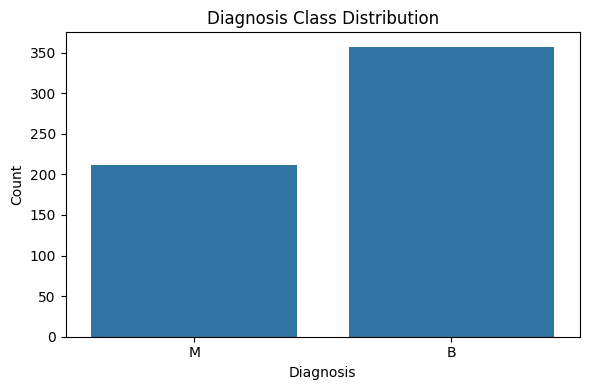

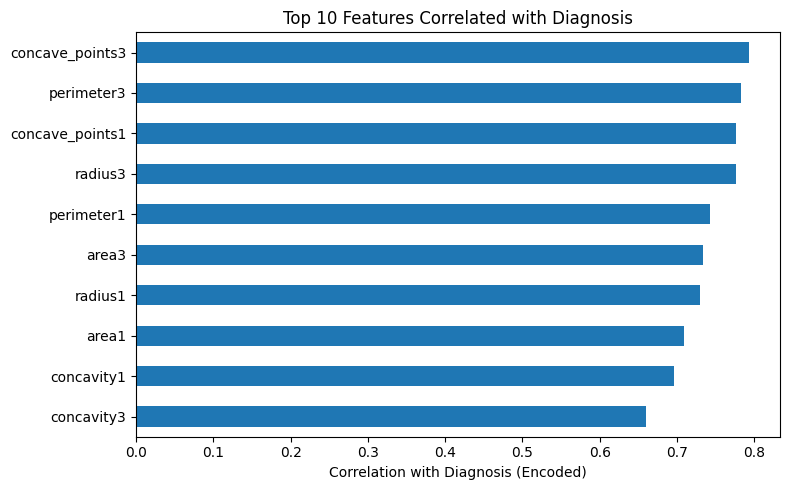

In [9]:
y = y.squeeze()
df = pd.concat([X, y.rename("Diagnosis")], axis=1)


le = LabelEncoder()
df["Diagnosis_Encoded"] = le.fit_transform(df["Diagnosis"])
print(le.classes_)          # array(['B', 'M'])
print(le.transform(le.classes_)) # Out: [0 1]

class_counts = df["Diagnosis"].value_counts()
imbalance_ratio = class_counts / class_counts.sum()
print("Class Imbalance Ratio:")
print(imbalance_ratio)


correlation = df.corr(numeric_only=True)["Diagnosis_Encoded"].sort_values(ascending=False)
top_features = correlation.drop("Diagnosis_Encoded").head(10)

plt.figure(figsize=(6, 4))
sns.countplot(x="Diagnosis", data=df)
plt.title("Diagnosis Class Distribution")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
top_features.plot(kind="barh")
plt.title("Top 10 Features Correlated with Diagnosis")
plt.xlabel("Correlation with Diagnosis (Encoded)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [10]:
print("Dataset Shape",  {"n_samples": [X.shape[0]], "n_features": [X.shape[1]]})
print(X.shape)
print(y.shape)
print(y[0])
print(df["Diagnosis"][0])
print(df["Diagnosis_Encoded"][0])

Dataset Shape {'n_samples': [569], 'n_features': [30]}
(569, 30)
(569,)
M
M
1


In [11]:
desc_stats = X.describe().T
# print(desc_stats)
from tabulate import tabulate
print("=== Descriptive Statistics ===")
print(tabulate(desc_stats.round(3), headers='keys', tablefmt='github'))

=== Descriptive Statistics ===
|                    |   count |    mean |     std |     min |     25% |     50% |      75% |      max |
|--------------------|---------|---------|---------|---------|---------|---------|----------|----------|
| radius1            |     569 |  14.127 |   3.524 |   6.981 |  11.7   |  13.37  |   15.78  |   28.11  |
| texture1           |     569 |  19.29  |   4.301 |   9.71  |  16.17  |  18.84  |   21.8   |   39.28  |
| perimeter1         |     569 |  91.969 |  24.299 |  43.79  |  75.17  |  86.24  |  104.1   |  188.5   |
| area1              |     569 | 654.889 | 351.914 | 143.5   | 420.3   | 551.1   |  782.7   | 2501     |
| smoothness1        |     569 |   0.096 |   0.014 |   0.053 |   0.086 |   0.096 |    0.105 |    0.163 |
| compactness1       |     569 |   0.104 |   0.053 |   0.019 |   0.065 |   0.093 |    0.13  |    0.345 |
| concavity1         |     569 |   0.089 |   0.08  |   0     |   0.03  |   0.062 |    0.131 |    0.427 |
| concave_points1    |  

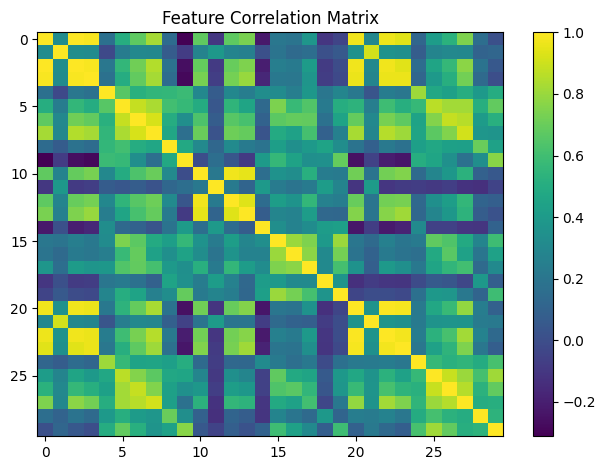

In [15]:
plt.figure()   # feature correlation
plt.imshow(X.corr(), aspect="auto")
plt.title("Feature Correlation Matrix")
plt.colorbar()
plt.tight_layout()
plt.show()

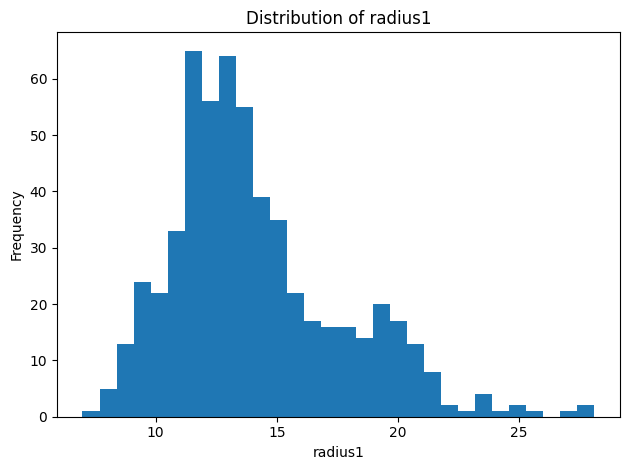

In [14]:
plt.figure()  # individual features - i.e radius1
plt.hist(X["radius1"], bins=30)
plt.title("Distribution of radius1")
plt.xlabel("radius1")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## **Data Preprocessing**

In [39]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [17]:
print(y[0])
print(df["Diagnosis_Encoded"][0])

M
1


In [18]:
y = df["Diagnosis_Encoded"] # encode y to 0 and 1
print(y[0])
print(y.shape)

1
(569,)


In [21]:
numeric_features = X.columns.tolist()
numeric_transformer = Pipeline(steps=[
    ("normalization", StandardScaler())
])
preprocess = ColumnTransformer(
    transformers=[("normalization_numeric", numeric_transformer, numeric_features)]
)

rf_model = RandomForestClassifier(random_state=33) # define a random forest model
pipeline = Pipeline(steps=[("preprocess", preprocess), ("rf_model", rf_model)]) # data normalization + model creation

## **Hyperparameter Search & Training & Testing**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=33
)

param_dist = {
    "rf_model__n_estimators": np.arange(100, 501, 100),
    "rf_model__max_depth": [None, 5, 10, 20],
    "rf_model__min_samples_split": [2, 4, 6],
    "rf_model__min_samples_leaf": [1, 2, 4],
    "rf_model__max_features": ["sqrt", "log2", None]
}
param_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,
    scoring="neg_log_loss",  # negated binary cross‑entropy
    cv=5,
    n_jobs=-1,
    random_state=33,
    verbose=0
)

param_search.fit(X_train, y_train)   # train the model with randomized hyperparameter search
best_model = param_search.best_estimator_

In [28]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred, pos_label=1),
    "recall": recall_score(y_test, y_pred, pos_label=1),
    "f1_score": f1_score(y_test, y_pred, pos_label=1),
    "log_loss": log_loss(y_test, y_proba)
}
print(metrics)

{'accuracy': 0.9122807017543859, 'precision': 0.9, 'recall': 0.8571428571428571, 'f1_score': 0.8780487804878049, 'log_loss': 0.5165756323333287}


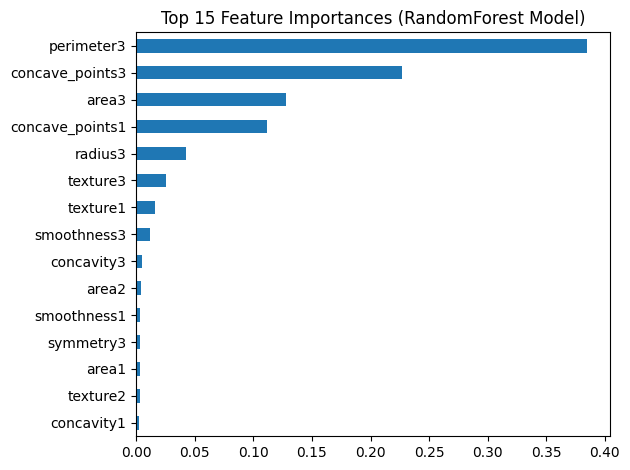

In [33]:
rf_model_param = best_model.named_steps["rf_model"]
important_features = pd.Series(rf_model_param.feature_importances_, index=numeric_features)
top_features = important_features.sort_values(ascending=False)
plt.figure()
top_features.head(15).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (RandomForest Model)")
plt.tight_layout()
plt.show()

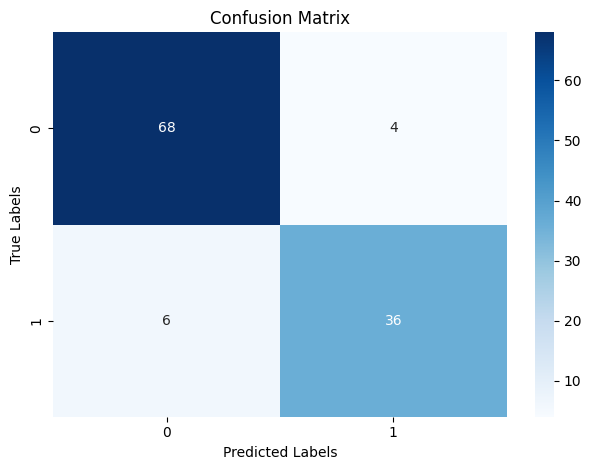

In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

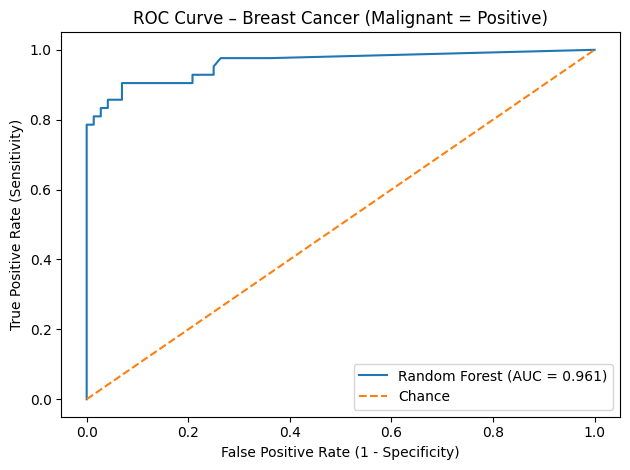

In [40]:
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=1)
plt.figure()
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve – Breast Cancer (Malignant = Positive)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()